coefficient of determination: 0.8111950753213943


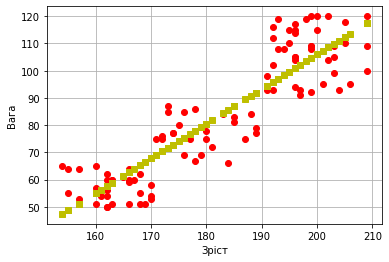

<ipython-input-87-661965579df6>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Xtrn, Ytrn)


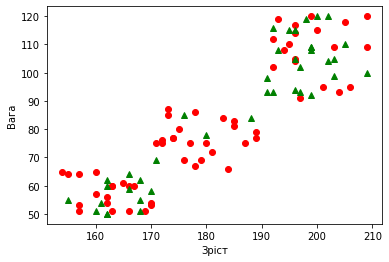

Точність :  0.9473684210526315


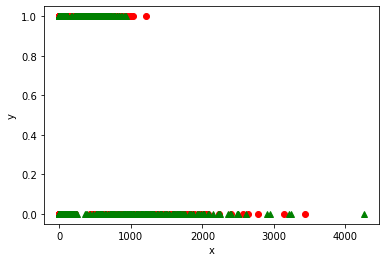

In [87]:
#Sklearn (провести вирішення задачі регресії та класифікації)

import numpy as np
from random import randint
from sklearn.linear_model import LinearRegression

# Візьмемо задачу з ростом людини та вагою
# Лінійна регрессія 
x = np.empty(100)
y = np.empty(100)
for i in range(100):
    x[i] = randint(150,210) # Зріст від 150 до 210
    if(x[i]>=150 and x[i]<=170):
        y[i] = randint(50,65)
    elif(x[i]>=171 and x[i]<=190):
        y[i] = randint(66,90)
    elif(x[i]>=191):
        y[i] = randint(91,120) # Вага від 50 до 120

X = x
x = x.reshape((-1, 1))

model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
y_pred = model.predict(x)

import matplotlib.pyplot as plt
plt.xlabel("Зріст")
plt.ylabel("Вага")
plt.grid()
plt.plot(x, y,'ro', x, y_pred, 'ys')
plt.show()

# Дерево рішень 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.DataFrame(data = [X, y])
df = df.T
df.columns = ['Зріст', 'Вага']
model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')

trg = df[['Вага']]
trn = df.drop(['Вага'], axis=1)

Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)

model.fit(Xtrn, Ytrn)
model.feature_importances_

plt.xlabel("Зріст")
plt.ylabel("Вага")
plt.plot(Xtrn,Ytrn,'ro',Xtest,Ytest,'g^')
plt.show()

# Класифікація 

import sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() #Завантажимо дані про рак. Де 0 - злоякісний рак. 1 - доброякісний

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

train, test, train_labels, test_labels = train_test_split(features,labels,test_size = 0.50, random_state = 52)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
from sklearn.metrics import accuracy_score
print("Точність : ",accuracy_score(test_labels,preds))
